# Projeto 2 de Ciência dos Dados

Integrantes:
- Barbara Martins Damasceno
- Daniel Costa Delattre 
- Guilherme Augusto Carvalho

## Objetivo 
**Pergunta que queremos responder**
Qual é o preço de uma casa de acordo com suas características?

Carregando algumas bibliotecas:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os, csv, string, re
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    '''
    X: coluna(s) do DataFrame que serão utilizadas como variável(is) preditoras/explicativas (independente(s))
    Y: coluna do DataFrame que será utilizada como variável resposta (dependente)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

Verificando o diretório

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\Documents\2 Semestre ENG\Ciência dos Dados\2Projeto\house-prediction-cdados


Carregando a base de dados de teste e de treino:

In [5]:
dados= pd.read_csv('datacasas.csv')
#dadosteste = pd.read_csv('t1.xlsx', sheet_name='Teste')

Verificando se não existe linhas sem dados/informação

In [6]:
np.sum(dados.isnull())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Mostrando quais são as colunas disponíveis no dataset:

In [7]:
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
dados.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


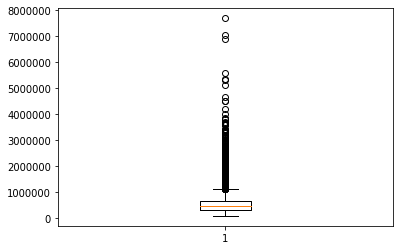

In [9]:
#Temos que ver se isso vai ser legal colocar ou não
plt.boxplot(dados['price'])
plt.show()

# Analise exploratória 

Para visualizar o comportamento de cada variável do dataset (preço, número de banheiros, números de quartos, área da casa e do seu terreno, etc) foram plotados gráficos para identificar a distribuição de cada uma delas dentro do dataset. Além disso, como a variável de interesse para prever é o preço de casas, foram plotados alguns gráficos para visualizar a interação entre a coluna de preços das casas e as demais colunas. 

## Distribuição de cada variável

Abaixo está os gráficos da distribuição de cada variável, exceto da coluna com os preços, ela será analisada posteriormente:

Text(0, 0.5, 'Lote do terreno (square feet)')

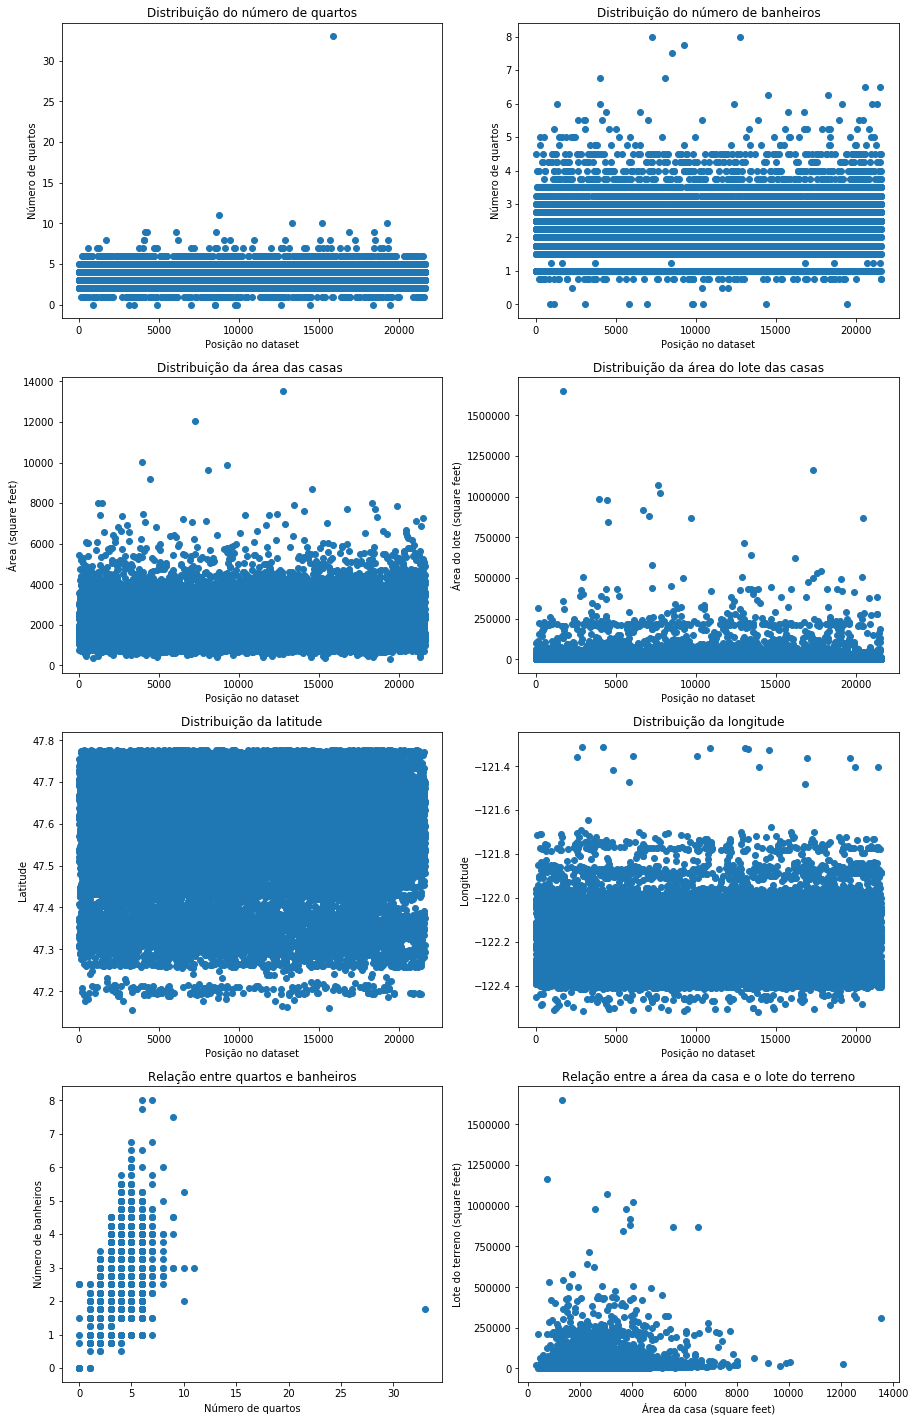

In [10]:
fig = plt.figure(figsize=(15, 25))

numero_linhas = np.arange(0,len(dados.price),1)

plt.subplot(4, 2, 1)
plt.scatter(numero_linhas,dados.bedrooms)
plt.title('Distribuição do número de quartos')
plt.xlabel("Posição no dataset")
plt.ylabel("Número de quartos")

plt.subplot(4, 2, 2)
plt.scatter(numero_linhas,dados.bathrooms)
plt.title('Distribuição do número de banheiros')
plt.xlabel("Posição no dataset")
plt.ylabel("Número de quartos")

plt.subplot(4, 2, 3)
plt.scatter(numero_linhas,dados.sqft_living)
plt.title('Distribuição da área das casas ')
plt.xlabel("Posição no dataset")
plt.ylabel("Área (square feet)")

plt.subplot(4, 2, 4)
plt.scatter(numero_linhas,dados.sqft_lot)
plt.title('Distribuição da área do lote das casas')
plt.xlabel("Posição no dataset")
plt.ylabel("Área do lote (square feet)")

plt.subplot(4, 2, 5)
plt.scatter(numero_linhas,dados.lat)
plt.title('Distribuição da latitude')
plt.xlabel("Posição no dataset")
plt.ylabel("Latitude")

plt.subplot(4, 2, 6)
plt.scatter(numero_linhas,dados.long)
plt.title('Distribuição da longitude')
plt.xlabel("Posição no dataset")
plt.ylabel("Longitude")

#Observando a relação entre o número de quartos e banheiros
plt.subplot(4,2,7)
plt.scatter(dados.bedrooms, dados.bathrooms)
plt.title('Relação entre quartos e banheiros')
plt.xlabel('Número de quartos')
plt.ylabel('Número de banheiros')

#Observando a relação entre a área da casa e o lote do terreno
plt.subplot(4,2,8)
plt.scatter(dados.sqft_living, dados.sqft_lot)
plt.title('Relação entre a área da casa e o lote do terreno')
plt.xlabel('Área da casa (square feet)')
plt.ylabel('Lote do terreno (square feet)')

Agora, iremos analisar a coluna do preço:

Text(0, 0.5, 'Preço da casa')

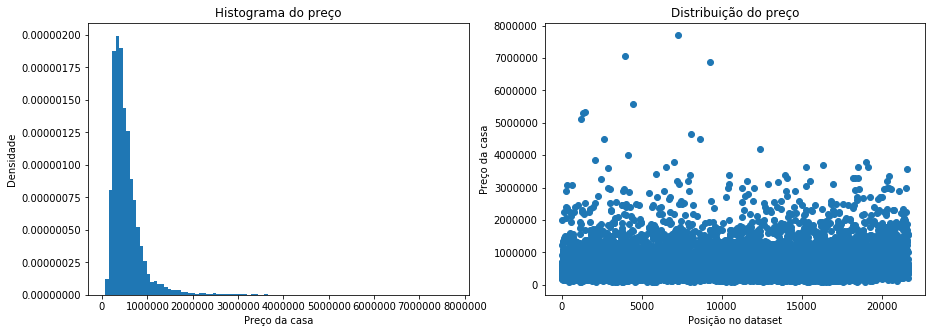

In [11]:
#Plotando as informações em gráficos
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(dados.price,bins=100,density=True)
plt.title('Histograma do preço')
plt.ylabel('Densidade')
plt.xlabel('Preço da casa')

plt.subplot(1, 2, 2)
faixa_aleatoria = np.arange(0,len(dados.price),1)
plt.scatter(faixa_aleatoria,dados.price)
plt.title('Distribuição do preço')
plt.xlabel('Posição no dataset')
plt.ylabel('Preço da casa')

#### Histograma do preço
O histograma se trata de gráfico que apresenta a distribuição de acordo com a frequência de uma amostra. Pode-se perceber que o histograma está deslocado a esquerda, mostrando que os preços dos dados se concentram até 1.000.000

#### Distribuição do preço
Esse gráfico cada ponto representa o valor de cada casa. Nele também percebe-se a concentração bem acentuada na faixa de 1 milhões e uma concentração mais leve entre 1 milhão e 2 milhões.

Como a variável de interesse para se prever é o preço, foi plotado gráficos cruzando os dados do preço com outras colunas:

Text(0, 0.5, 'Área do terreno')

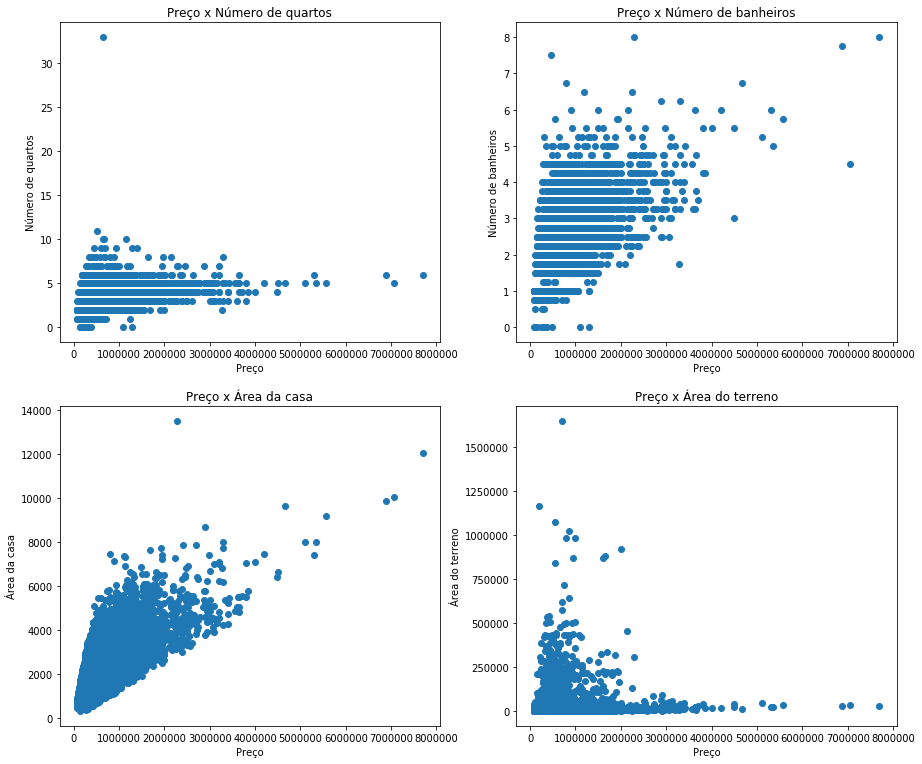

In [12]:
#Plotando as informações em gráficos
fig = plt.figure(figsize=(15, 20))

plt.subplot(3,2,3)
plt.scatter(dados.price, dados.bedrooms)
plt.title('Preço x Número de quartos')
plt.xlabel('Preço')
plt.ylabel('Número de quartos')

plt.subplot(3,2,4)
plt.scatter(dados.price, dados.bathrooms)
plt.title('Preço x Número de banheiros')
plt.xlabel('Preço')
plt.ylabel('Número de banheiros')

plt.subplot(3,2,5)
plt.scatter(dados.price, dados.sqft_living)
plt.title('Preço x Área da casa')
plt.xlabel('Preço')
plt.ylabel('Área da casa')

plt.subplot(3,2,6)
plt.scatter(dados.price, dados.sqft_lot)
plt.title('Preço x Área do terreno')
plt.xlabel('Preço')
plt.ylabel("Área do terreno")

# Predição por Regressão Linear Multipla

~Explicar sobre o que é e como funciona o método

Definindo variável de interesse (preço) e demais que serão base para a predição

In [18]:
X = dados[['bedrooms', 'bathrooms', 'sqft_living','waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']]
Y = dados['price']

In [19]:
X.corr()

,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
bedrooms,1.000000,0.515884,0.576671,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473
bathrooms,0.515884,1.000000,0.754665,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042
sqft_living,0.576671,0.754665,1.000000,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223
waterfront,-0.006582,0.063744,0.103818,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910
view,0.079532,0.187737,0.284611,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400
condition,0.028472,-0.124982,-0.058753,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500
grade,0.356967,0.664983,0.762704,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372
sqft_above,0.477600,0.685342,0.876597,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.000816,0.343803
sqft_basement,0.303093,0.283770,0.435043,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.110538,-0.144765
yr_built,0.154178,0.506019,0.318049,-0.026161,-0.053440,-0.361417,0.446963,0.423898,-0.133124,1.000000,-0.224874,-0.148122,0.409356


In [20]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4085.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:57:46   Log-Likelihood:            -2.9480e+05
No. Observations:               21613   AIC:                         5.896e+05
Df Residuals:                   21600   BIC:                         5.897e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.561e+07   1.49e+06    -23.826      0.000   -3.85e+07   -3.27e+07
bedrooms      -3.353e+04   1898.199    -17.664      0.000   -3.72e+04   -2.98e+04
bathrooms      4.157e+04   3160.679     13.153      0.000    3.54e+04    4.78e+04
sqft_living     113.8916      2.107     54.056      0.000     109.762     118.021
waterfront     5.835e+05   1.75e+04     33.327      0.000    5.49e+05    6.18e+05
view           5.167e+04   2123.805     24.330      0.000    4.75e+04    5.58e+04
condition      3.042e+04   2351.818     12.936      0.000    2.58e+04     3.5e+04
grade          1.023e+05   2074.293     49.337      0.000    9.83e+04    1.06e+05
sqft_above       75.0437      2.009     37.360      0.000      71.107      78.981
sqft_basement    38.8481      2.424     16.028      0.000      34.097      43.599
yr_built      -2471.8056     70.928    -34.849      0.000   -2610.831   -2332.781
yr_renovated     19.7531      3.677      5.373      0.000      12.547      26.960
lat            5.655e+05   1.05e+04     53.994      0.000    5.45e+05    5.86e+05
long          -1.052e+05   1.13e+04     -9.319      0.000   -1.27e+05   -8.31e+04
==============================================================================
Omnibus:                    18252.919   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1750157.662
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      46.511   Cond. No.                     1.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Análise da tabela

Falar da relevância das variáveis escolhidas, R², prob e etc...

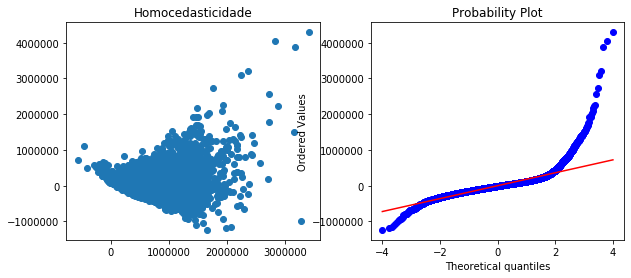

In [38]:
resultado_reg = results.resid

y_predict = results.predict(sm.add_constant(X))

fig1 = plt.figure(figsize=(10, 4))

#Verificando a Homocedasticidade
plt.subplot(1,2,1)
plt.scatter(y_predict,resultado_reg)
plt.title("Homocedasticidade")

#Verificando se os resultados obtidos por regressão apresentam distribuição normal
plt.subplot(1,2,2)
stats.probplot(resultado_reg,dist='norm',plot=plt)
plt.show()

Percebe-se que os valores preditos não seguem a distribuição normal e que a homocedasticidade varia.

# Predição por Decision Tree Regressor

~Explicar sobre o que é e como funciona o método

Escolhendo as colunas que serão usadas como parâmetros:

In [27]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'lat', 'long',]

Renomeando quem será a variável de interesse (preço) e as features. Além de separar o banco de dados entre teste e treinamento:

In [28]:
y = dados.price
x = dados[features]

xtreino,xvalidacao,ytreino,yvalidacao = train_test_split(x, y, random_state=1)

In [29]:
# Especificando o modelo
modelo_decisiontree = DecisionTreeRegressor()
# Fit do modelo 
modelo_decisiontree.fit(xtreino, ytreino)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
# Faz a previsão do preço das casas e calcula a média dos erros com base 
val_predictions = modelo_decisiontree.predict(xvalidacao)
val_mae = mean_absolute_error(val_predictions, yvalidacao)
print(f'MAE: {val_mae:.2f}')

MAE: 99996.75


# Predição por Random Forest

~Explicar sobre o que é e como funciona o método

In [31]:
#modelo usando random forest 
modelo_randomforest = RandomForestRegressor(random_state=1)
modelo_randomforest.fit(xtreino, ytreino)
rf_predict = modelo_randomforest.predict(xvalidacao)
rf_mae = mean_absolute_error(rf_predict, yvalidacao)

print(f'Random Forest MAE: {rf_mae:.2f}')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest MAE: 75215.53


Esse gŕafico mostra a relação entre os valores previstos e os valores reais

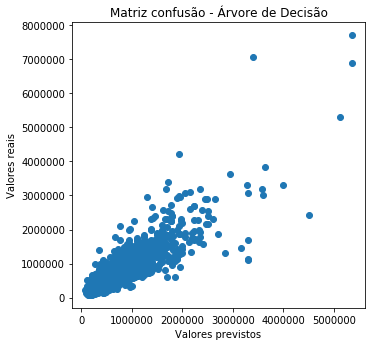

In [32]:
fig1 = plt.figure(figsize=(5.25,5.25))
plt.scatter(val_predictions,yvalidacao)
plt.title("Matriz confusão - Árvore de Decisão")
plt.xlabel("Valores previstos")
plt.ylabel('Valores reais')
plt.show()